/var/folders/gb/604kkgfn2cj2q1bp1zw3t56m0000gn/T/ipykernel_70656/199511218.py:16: FutureWarning: The provided callable <function mean at 0x107212f20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped_df = engine_df.groupby('num_chunks')['time'].agg([np.mean, np.std]).reset_index()
/var/folders/gb/604kkgfn2cj2q1bp1zw3t56m0000gn/T/ipykernel_70656/199511218.py:16: FutureWarning: The provided callable <function std at 0x107213060> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  grouped_df = engine_df.groupby('num_chunks')['time'].agg([np.mean, np.std]).reset_index()


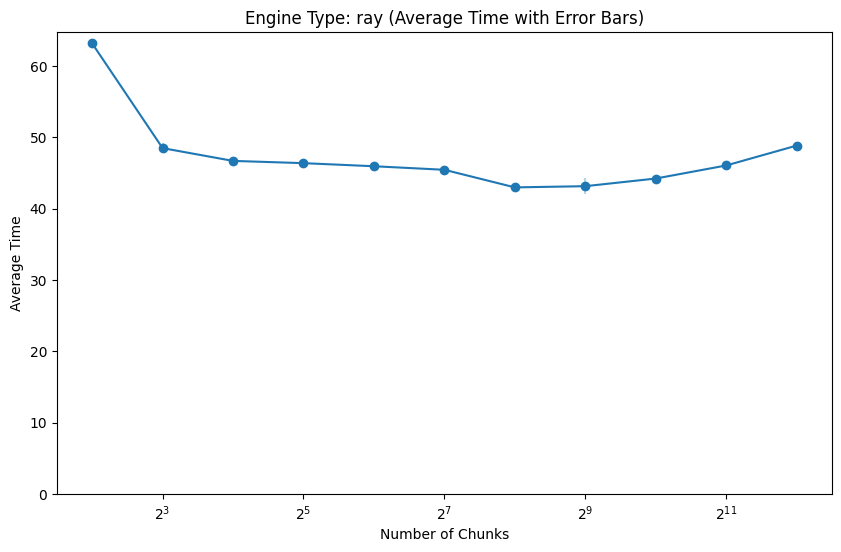

/var/folders/gb/604kkgfn2cj2q1bp1zw3t56m0000gn/T/ipykernel_70656/199511218.py:41: FutureWarning: The provided callable <function mean at 0x107212f20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped_df = engine_df.groupby('chunks_per_core')['time'].agg([np.mean, np.std]).reset_index()
/var/folders/gb/604kkgfn2cj2q1bp1zw3t56m0000gn/T/ipykernel_70656/199511218.py:41: FutureWarning: The provided callable <function std at 0x107213060> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  grouped_df = engine_df.groupby('chunks_per_core')['time'].agg([np.mean, np.std]).reset_index()


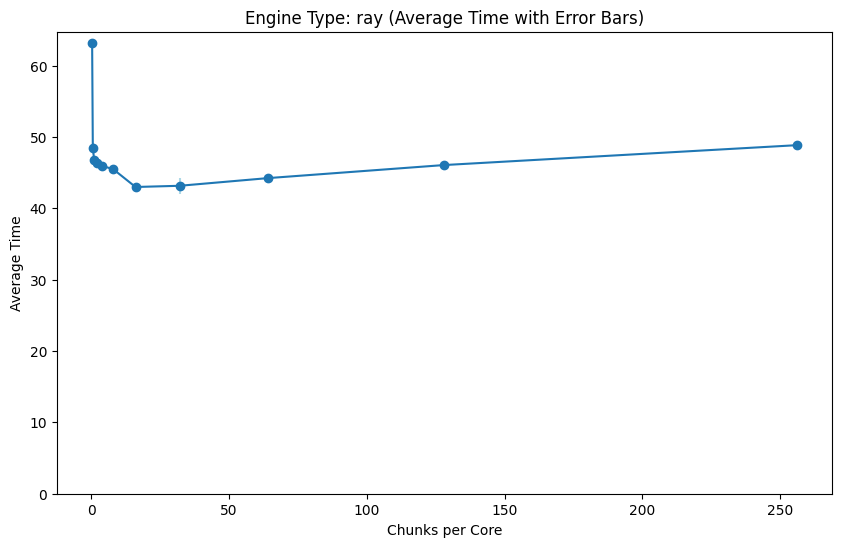

/var/folders/gb/604kkgfn2cj2q1bp1zw3t56m0000gn/T/ipykernel_70656/199511218.py:58: FutureWarning: The provided callable <function mean at 0x107212f20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped_df = engine_df.groupby('chunks_per_core')['max_mem'].agg([np.mean, np.std]).reset_index()
/var/folders/gb/604kkgfn2cj2q1bp1zw3t56m0000gn/T/ipykernel_70656/199511218.py:58: FutureWarning: The provided callable <function std at 0x107213060> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  grouped_df = engine_df.groupby('chunks_per_core')['max_mem'].agg([np.mean, np.std]).reset_index()


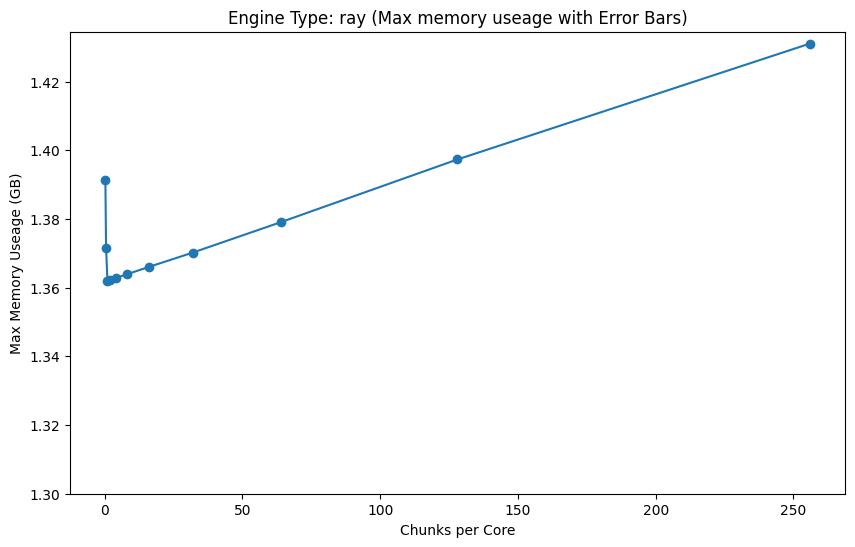

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('autoMeasurementData.csv')

# Get unique engine types
engine_types = df['engine'].unique()

# For each engine type, plot a graph
for engine in engine_types:
    engine_df = df[df['engine'] == engine]

    # Group by 'num_chunks' and calculate the mean and std of 'time'
    grouped_df = engine_df.groupby('num_chunks')['time'].agg([np.mean, np.std]).reset_index()

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.errorbar(grouped_df['num_chunks'], grouped_df['mean'], yerr=grouped_df['std'], fmt='-o', ecolor='lightblue')
    ax.set_ylim(bottom=0)

    # Set x-axis to logarithmic scale with base 2
    ax.set_xscale('log', base=2)

    ax.set_title(f'Engine Type: {engine} (Average Time with Error Bars)')
    ax.set_xlabel('Number of Chunks')
    ax.set_ylabel('Average Time')
    plt.show()

# Create a new column 'chunks_per_core'
df['chunks_per_core'] = df['num_chunks'] / df['cpu_count']

# Get unique engine types
engine_types = df['engine'].unique()

# For each engine type, plot a graph
for engine in engine_types:
    engine_df = df[df['engine'] == engine]

    # Group by 'chunks_per_core' and calculate the mean and std of 'time'
    grouped_df = engine_df.groupby('chunks_per_core')['time'].agg([np.mean, np.std]).reset_index()

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.errorbar(grouped_df['chunks_per_core'], grouped_df['mean'], yerr=grouped_df['std'], fmt='-o', ecolor='lightblue')
    ax.set_ylim(bottom=0)

    ax.set_title(f'Engine Type: {engine} (Average Time with Error Bars)')
    ax.set_xlabel('Chunks per Core')
    ax.set_ylabel('Average Time')
    plt.show()

for engine in engine_types:
    engine_df = df[df['engine'] == engine]
    # Convert 'max_mem' from bytes to gigabytes
    engine_df['max_mem'] = engine_df['max_mem'] / (1024 ** 3)

    # Group by 'chunks_per_core' and calculate the mean and std of 'time'
    grouped_df = engine_df.groupby('chunks_per_core')['max_mem'].agg([np.mean, np.std]).reset_index()

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.errorbar(grouped_df['chunks_per_core'], grouped_df['mean'], yerr=grouped_df['std'], fmt='-o', ecolor='lightblue')
    ax.set_ylim(bottom=1.3)

    ax.set_title(f'Engine Type: {engine} (Max memory useage with Error Bars)')
    ax.set_xlabel('Chunks per Core')
    ax.set_ylabel('Max Memory Useage (GB)')
    plt.show()